## Chapter 3

## Overview of Machine Learning and Deep Learning Concepts

This chapter is focused on exploring the realm of machine learning and deep learning algorithms. 


In [145]:
print("Sta")

Sta


In [146]:
import pandas as pd
import numpy as np

In [147]:
from tensorflow.keras.models import Sequential

In [148]:
from tensorflow.keras.layers import Dense, Dropout

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
from sklearn.pipeline import Pipeline

In [152]:
import xgboost as xgb

In [153]:
# import all the libraries required for this chapter
# Machine Learning Libraries: scikit-learn, keras and tensorflow

# setting seed for model reproducibility
seed_value = 42
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)
import pandas as pd

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize, Normalizer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import sklearn.cluster as cluster
import lightgbm as lgb
import xgboost as xgb

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
# from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from keras.utils import np_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# plotting libraries
import matplotlib as mpl
import matplotlib.style
import seaborn as sns  # visualization
import matplotlib.pyplot as plt
# formatting for decimal places
pd.set_option("display.float_format", "{:.2f}".format)

sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [155]:
# import the .csv file as a dataframe - Raw Data File
data = pd.read_csv('/Users/staschernyshov/Desktop/OIL&GAS MACHINE LEARNING PYTHON/Pandey_Ch03_Overview_of_Machine_Learning_and_Deep_Learning_Concepts_Code/data/Merged_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5127 entries, 0 to 5126
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL NAME             5127 non-null   object 
 1   DEPTH (M)             5127 non-null   float64
 2   BVW (V/V)             4891 non-null   float64
 3   CARB_FLAG (UNITLESS)  4980 non-null   float64
 4   COAL_FLAG (UNITLESS)  5127 non-null   float64
 5   KLOGH (MD)            4891 non-null   float64
 6   PHIF (V/V)            4891 non-null   float64
 7   RHOFL (G/CM3)         5127 non-null   float64
 8   RHOMA (G/CM3)         4891 non-null   float64
 9   RW (OHMM)             4891 non-null   float64
 10  SAND_FLAG (UNITLESS)  4891 non-null   float64
 11  SW (V/V)              4891 non-null   float64
 12  TEMP (DEGC)           4891 non-null   float64
 13  VSH (V/V)             4891 non-null   float64
 14  LITHOTYPE             5127 non-null   object 
dtypes: float64(13), objec

In [156]:
# Basic Exploratory Data Analysis and Data Cleaning
print(data.head(10))
print('Shape of Dataset (rows,columns):', data.shape)

   WELL NAME  DEPTH (M)  BVW (V/V)  CARB_FLAG (UNITLESS)  \
0  15/9-19 A    3666.59       0.11                  0.00   
1  15/9-19 A    3666.74       0.11                  0.00   
2  15/9-19 A    3666.90       0.11                  0.00   
3  15/9-19 A    3667.05       0.11                  0.00   
4  15/9-19 A    3667.20       0.12                  0.00   
5  15/9-19 A    3667.35       0.11                  0.00   
6  15/9-19 A    3667.51       0.12                  0.00   
7  15/9-19 A    3667.66       0.12                  0.00   
8  15/9-19 A    3667.81       0.13                  0.00   
9  15/9-19 A    3667.96       0.13                  0.00   

   COAL_FLAG (UNITLESS)  KLOGH (MD)  PHIF (V/V)  RHOFL (G/CM3)  RHOMA (G/CM3)  \
0                  0.00        0.00        0.20           0.80           2.66   
1                  0.00        0.00        0.22           0.80           2.66   
2                  0.00        0.00        0.24           0.80           2.66   
3              

Until this point there is no data cleaning being performed. The objective of the next few sections is to wrangle the data and prepare it for the machine learning model stage. The current dataset consists of petrophysical properties from two different wells in Volve field. A majority of columns have float datatype except Well Name and Lithotype. In the case of regression problems, only quantitative columns would be considered, whereas in the case of classification, 'Lithotype' would be the response variable. 

<Axes: >

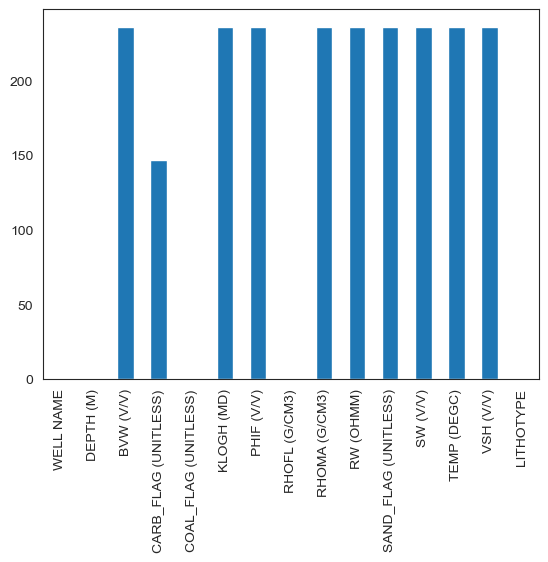

In [157]:
# Find number of empty/NA values in each column
data.isna().sum().plot(kind="bar")

In [158]:
# Descriptive Statistics
data.describe(include="all")

WELL NAME  DEPTH (M)  BVW (V/V)  CARB_FLAG (UNITLESS)  \
count          5127    5127.00    4891.00               4980.00   
unique            2        NaN        NaN                   NaN   
top     15/9-19 BT2        NaN        NaN                   NaN   
freq           3162        NaN        NaN                   NaN   
mean            NaN    3935.10       0.10                  0.03   
std             NaN     153.56       0.06                  0.18   
min             NaN    3666.59       0.00                  0.00   
25%             NaN    3814.95       0.06                  0.00   
50%             NaN    3912.57       0.09                  0.00   
75%             NaN    4054.53       0.12                  0.00   
max             NaN    4249.83       0.25                  1.00   

        COAL_FLAG (UNITLESS)  KLOGH (MD)  PHIF (V/V)  RHOFL (G/CM3)  \
count                5127.00     4891.00     4891.00        5127.00   
unique                   NaN         NaN         NaN            NaN   
top                      NaN         NaN         NaN            NaN   
freq                     NaN         NaN         NaN            NaN   
mean                    0.01      199.85        0.14           0.86   
std                     0.07      700.43        0.06           0.05   
min                     0.00        0.00        0.00           0.80   
25%                     0.00        0.00        0.10           0.80   
50%                     0.00        0.00        0.14           0.90   
75%                     0.00       23.31        0.20           0.90   
max                     1.00    13705.31        0.36           0.90   

        RHOMA (G/CM3)  RW (OHMM)  SAND_FLAG (UNITLESS)  SW (V/V)  TEMP (DEGC)  \
count         4891.00    4891.00               4891.00   4891.00      4891.00   
unique            NaN        NaN                   NaN       NaN          NaN   
top               NaN        NaN                   NaN       NaN          NaN   
freq              NaN        NaN                   NaN       NaN          NaN   
mean             2.66       0.02                  0.36      0.76       117.87   
std              0.01       0.00                  0.48      0.28         2.97   
min              2.63       0.02                  0.00      0.04       112.72   
25%              2.65       0.02                  0.00      0.56       115.43   
50%              2.66       0.02                  0.00      0.89       117.60   
75%              2.66       0.02                  1.00      1.00       119.84   
max              2.71       0.02                  1.00      1.00       124.09   

        VSH (V/V) LITHOTYPE  
count     4891.00      5127  
unique        NaN        20  
top           NaN     OTHER  
freq          NaN      3010  
mean         0.64       NaN  
std          0.62       NaN  
min          0.02       NaN  
25%          0.21       NaN  
50%          0.57       NaN  
75%          0.98       NaN  
max         17.12       NaN

<Axes: >

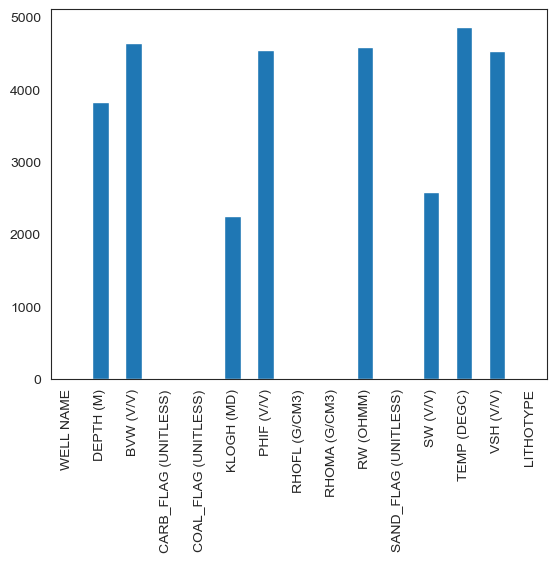

In [159]:
# Number of unique values
data.nunique().plot(kind="bar")

<Axes: >

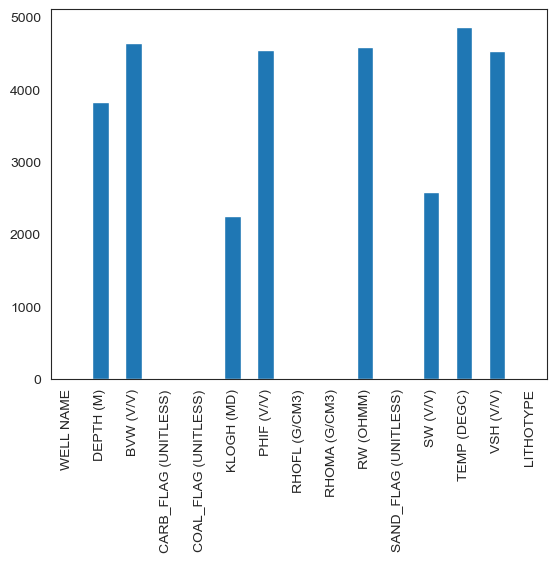

In [160]:
# Number of unique values
data.nunique().plot(kind="bar")

<Axes: >

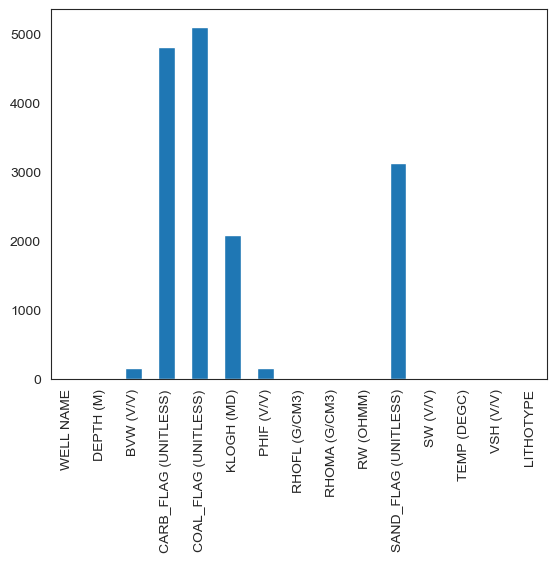

In [161]:
# Data Cleaning - How many columns have Null or value=0
data[data == 0].count(axis=0).plot(kind='bar')

In [162]:
data.dropna(inplace=True)
print('Shape of Dataset (rows,columns):', data.shape)

Shape of Dataset (rows,columns): (4818, 15)


<Axes: xlabel='TEMP (DEGC)', ylabel='Density'>

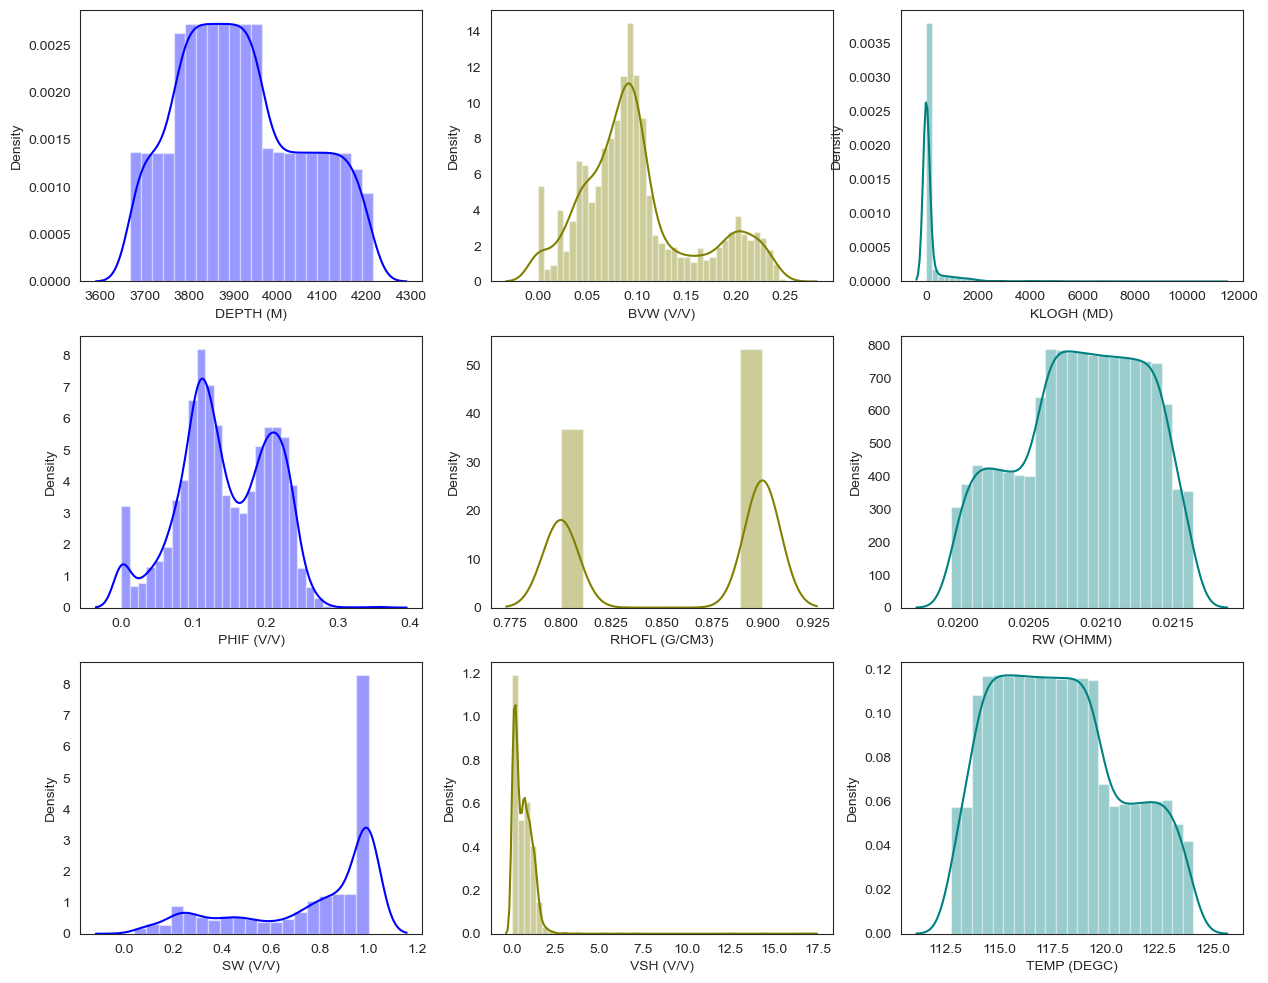

In [163]:
# Histogram - Distributions of continuous variables - only key features are shown here
# sns.set(color_codes=True)
f, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=False)
sns.distplot(data["DEPTH (M)"], color="blue", ax=axes[0, 0])
sns.distplot(data["BVW (V/V)"], color="olive", ax=axes[0, 1])
sns.distplot(data["KLOGH (MD)"], color="teal", ax=axes[0, 2])
sns.distplot(data["PHIF (V/V)"], color="blue", ax=axes[1, 0])
sns.distplot(data["RHOFL (G/CM3)"], color="olive", ax=axes[1, 1])
sns.distplot(data["RW (OHMM)"], color="teal", ax=axes[1, 2])
sns.distplot(data["SW (V/V)"], color="blue", ax=axes[2, 0])
sns.distplot(data["VSH (V/V)"], color="olive", ax=axes[2, 1])
sns.distplot(data["TEMP (DEGC)"], color="teal", ax=axes[2, 2])

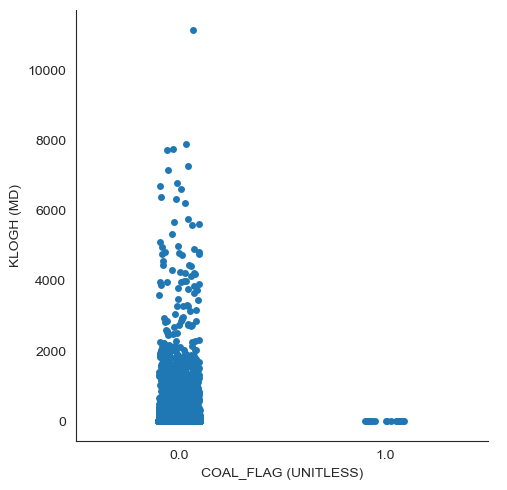

In [164]:
# plotting some categorical variables
sns.catplot(x="COAL_FLAG (UNITLESS)", y="KLOGH (MD)", data=data)
# sns.catplot(x="SAND_FLAG (UNITLESS)", y="KLOGH (MD)", data=data)
# sns.catplot(x="RHOFL (G/CM3)", y="KLOGH (MD)", data=data)

<Axes: xlabel='SAND_FLAG (UNITLESS)'>

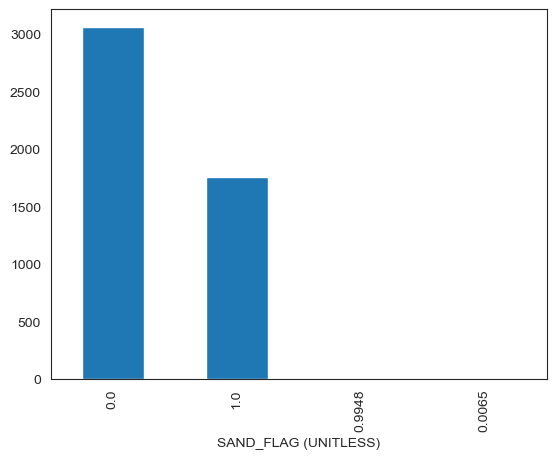

In [165]:
# data['CARB_FLAG (UNITLESS)'].value_counts().plot(kind='bar')
# data['COAL_FLAG (UNITLESS)'].value_counts().plot(kind='bar')
data['SAND_FLAG (UNITLESS)'].value_counts().plot(kind='bar')

<Axes: ylabel='TEMP (DEGC)'>

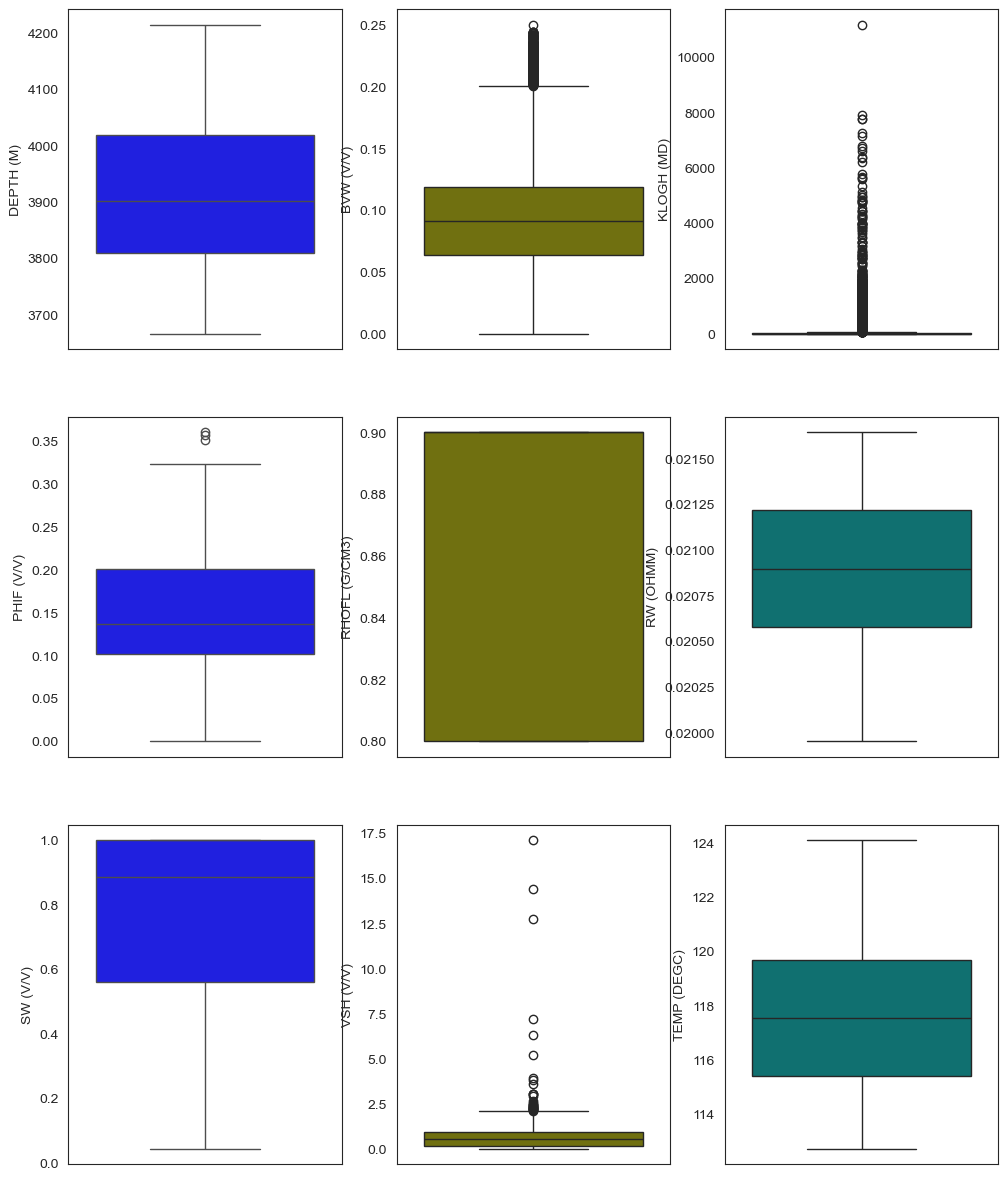

In [166]:
# Box Plots - Useful Tool to detect outliers
f, axes = plt.subplots(3, 3, figsize=(12, 15), sharex=False)
sns.boxplot(data["DEPTH (M)"], color="blue", ax=axes[0, 0])
sns.boxplot(data["BVW (V/V)"], color="olive", ax=axes[0, 1])
sns.boxplot(data["KLOGH (MD)"], color="teal", ax=axes[0, 2])
sns.boxplot(data["PHIF (V/V)"], color="blue", ax=axes[1, 0])
sns.boxplot(data["RHOFL (G/CM3)"], color="olive", ax=axes[1, 1])
sns.boxplot(data["RW (OHMM)"], color="teal", ax=axes[1, 2])
sns.boxplot(data["SW (V/V)"], color="blue", ax=axes[2, 0])
sns.boxplot(data["VSH (V/V)"], color="olive", ax=axes[2, 1])
sns.boxplot(data["TEMP (DEGC)"], color="teal", ax=axes[2, 2])

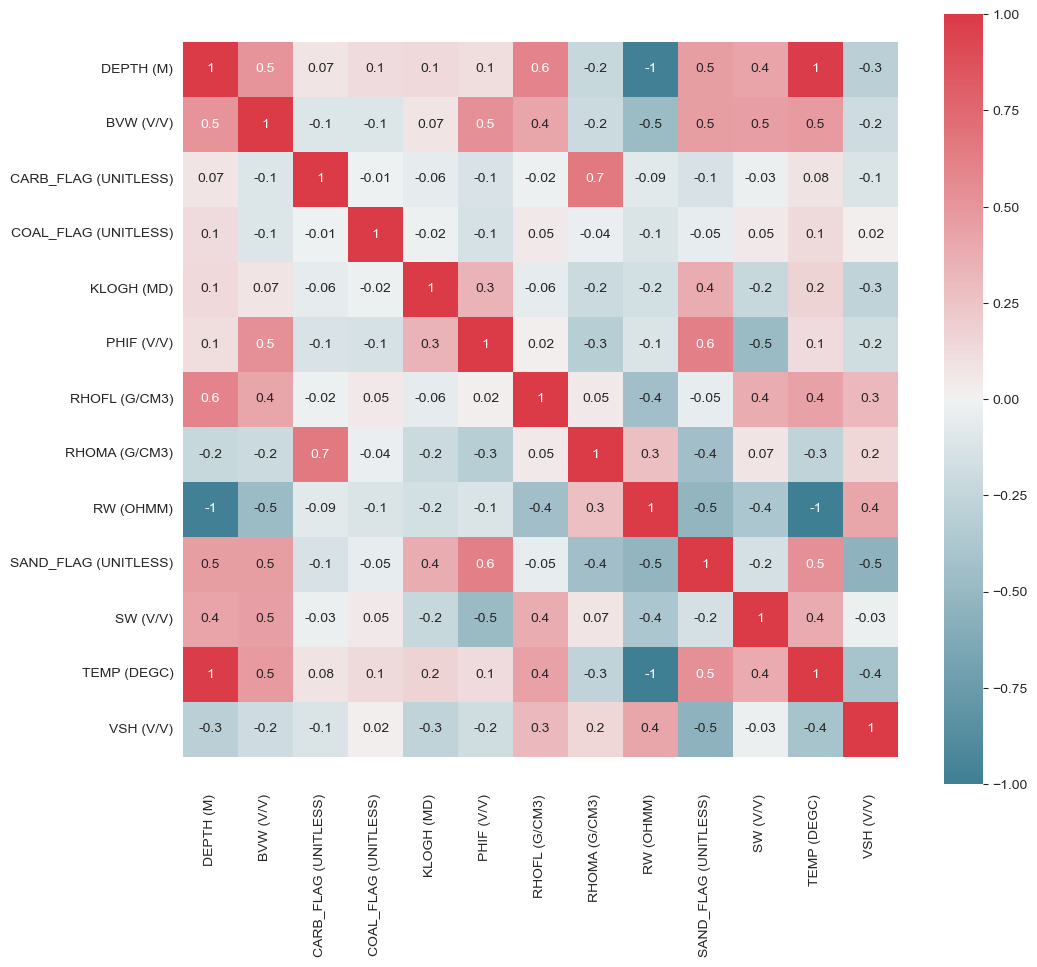

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter the DataFrame to only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap, square=True)

# Adjust the ylim to fix any truncation issues
b, t = plt.ylim()  # Get current y-limits
plt.ylim(b + 0.5, t - 0.5)  # Adjust limits to prevent truncation
plt.show()


<Axes: >

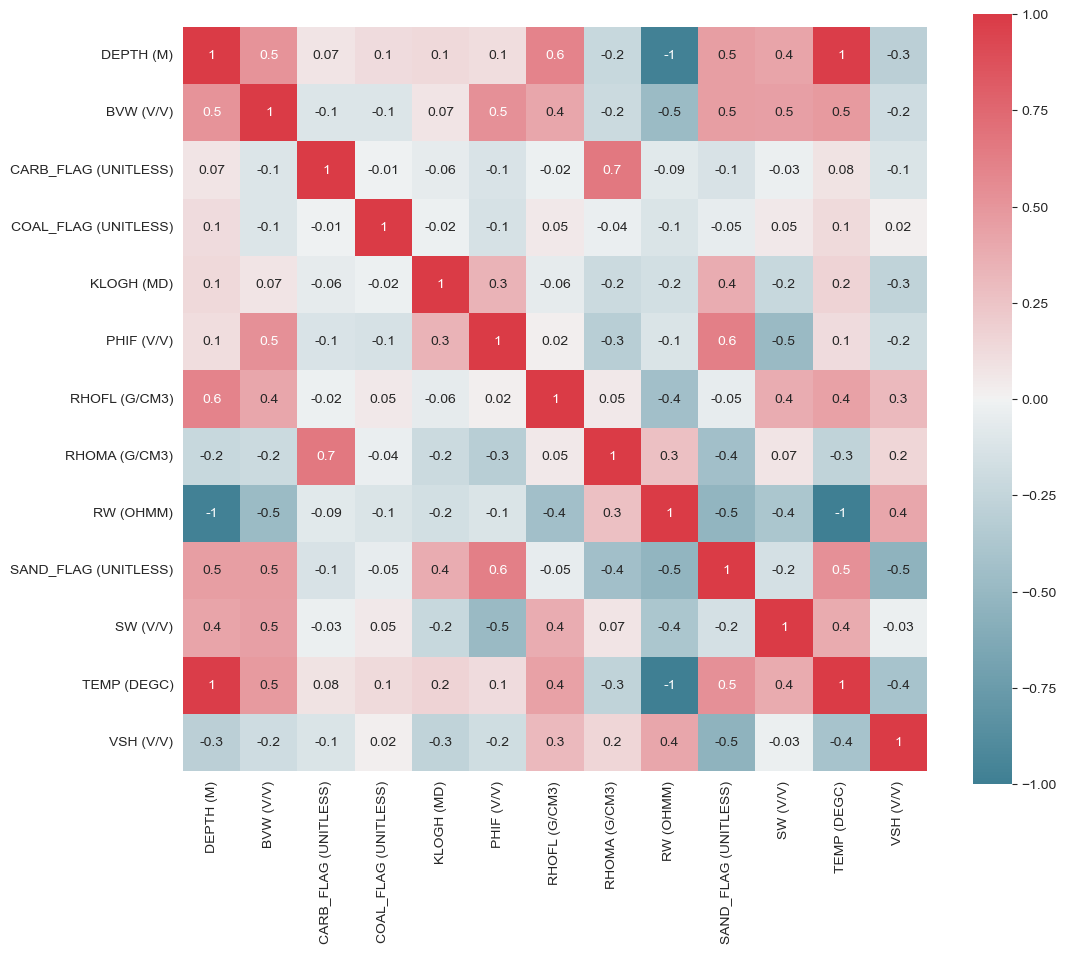

In [168]:
# heatmap to visualize any collinearlity between variables
plt.figure(figsize=(12, 10))
# Colormap definition
data = data.select_dtypes(include=['float64', 'int64'])
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), annot=True, fmt='.1g', vmin=-
            1, vmax=1, center=0, cmap=cmap, square=True)
# # matplotlib issue with truncation of top and bottom row
# b, t = plt.ylim()
# b += 0.5  # Add 0.5 to the bottom
# t -= 0.5  # Subtract 0.5 from the top
# plt.ylim(b, t)  # update the ylim(bottom, top) values

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]),
 [Text(-0.05, 0, '−0.05'),
  Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.10000000000000002, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25000000000000006, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35'),
  Text(0.4, 0, '0.40')])

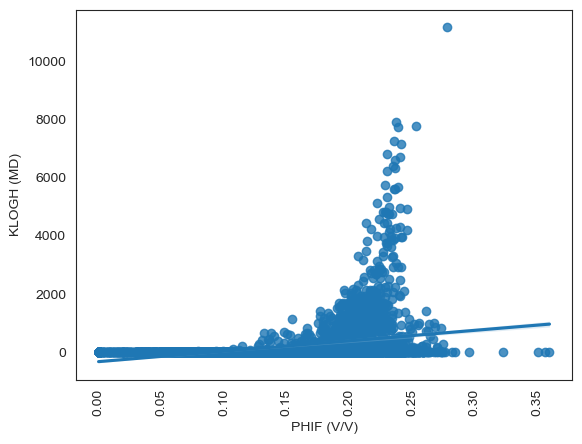

In [169]:
# An example of plot to check collinearity between certain variables
# looking into the correlation between Spacing and NN Spacing - All Zone/Same Zone
sns.regplot(x='PHIF (V/V)', y='KLOGH (MD)', data=data)
plt.xticks(rotation=90)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 4890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             4818 non-null   float64
 1   BVW (V/V)             4818 non-null   float64
 2   CARB_FLAG (UNITLESS)  4818 non-null   float64
 3   COAL_FLAG (UNITLESS)  4818 non-null   float64
 4   KLOGH (MD)            4818 non-null   float64
 5   PHIF (V/V)            4818 non-null   float64
 6   RHOFL (G/CM3)         4818 non-null   float64
 7   RHOMA (G/CM3)         4818 non-null   float64
 8   RW (OHMM)             4818 non-null   float64
 9   SAND_FLAG (UNITLESS)  4818 non-null   float64
 10  SW (V/V)              4818 non-null   float64
 11  TEMP (DEGC)           4818 non-null   float64
 12  VSH (V/V)             4818 non-null   float64
dtypes: float64(13)
memory usage: 527.0 KB


In [171]:
# # separate categorical columns
# columns_categ = ['WELL NAME', 'LITHOTYPE']
# data_cont = data.drop(data[columns_categ], axis=1)  # continous data
# # move response variable to end of dataframe
# data_cont = data_cont[[col for col in data_cont.columns if col != 'KLOGH (MD)'] + ['KLOGH (MD)']]
# data_cont.info()

data_cont = data
# Move response variable (KLOGH (MD)) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'KLOGH (MD)'] + ['KLOGH (MD)']]

# Display information about the modified DataFrame
data_cont.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 4890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             4818 non-null   float64
 1   BVW (V/V)             4818 non-null   float64
 2   CARB_FLAG (UNITLESS)  4818 non-null   float64
 3   COAL_FLAG (UNITLESS)  4818 non-null   float64
 4   PHIF (V/V)            4818 non-null   float64
 5   RHOFL (G/CM3)         4818 non-null   float64
 6   RHOMA (G/CM3)         4818 non-null   float64
 7   RW (OHMM)             4818 non-null   float64
 8   SAND_FLAG (UNITLESS)  4818 non-null   float64
 9   SW (V/V)              4818 non-null   float64
 10  TEMP (DEGC)           4818 non-null   float64
 11  VSH (V/V)             4818 non-null   float64
 12  KLOGH (MD)            4818 non-null   float64
dtypes: float64(13)
memory usage: 527.0 KB


In [172]:
# Splitting the dataset 
# Make sure to taht the response variable in the last column
X = data_cont.iloc[:, :-1]
y = data_cont.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [173]:
X

DEPTH (M)  BVW (V/V)  CARB_FLAG (UNITLESS)  COAL_FLAG (UNITLESS)  \
0       3666.59       0.11                  0.00                  0.00   
1       3666.74       0.11                  0.00                  0.00   
2       3666.90       0.11                  0.00                  0.00   
3       3667.05       0.11                  0.00                  0.00   
4       3667.20       0.12                  0.00                  0.00   
...         ...        ...                   ...                   ...   
4886    4213.25       0.12                  0.00                  0.00   
4887    4213.40       0.15                  0.00                  0.00   
4888    4213.56       0.13                  0.00                  0.00   
4889    4213.71       0.14                  0.00                  0.00   
4890    4213.86       0.13                  0.00                  0.00   

      PHIF (V/V)  RHOFL (G/CM3)  RHOMA (G/CM3)  RW (OHMM)  \
0           0.20           0.80           2.66       0.02   
1           0.22           0.80           2.66       0.02   
2           0.24           0.80           2.66       0.02   
3           0.23           0.80           2.66       0.02   
4           0.22           0.80           2.66       0.02   
...          ...            ...            ...        ...   
4886        0.15           0.90           2.65       0.02   
4887        0.17           0.90           2.65       0.02   
4888        0.13           0.90           2.65       0.02   
4889        0.14           0.90           2.65       0.02   
4890        0.13           0.90           2.65       0.02   

      SAND_FLAG (UNITLESS)  SW (V/V)  TEMP (DEGC)  VSH (V/V)  
0                     0.00      0.56       112.72       0.60  
1                     0.00      0.51       112.73       0.60  
2                     0.00      0.47       112.73       0.60  
3                     0.00      0.51       112.74       0.60  
4                     0.00      0.54       112.74       0.60  
...                    ...       ...          ...        ...  
4886                  0.00      0.80       124.08       0.86  
4887                  0.00      0.89       124.08       0.79  
4888                  0.00      1.00       124.09       0.68  
4889                  0.00      1.00       124.09       0.68  
4890                  0.00      0.98       124.09       0.70  

[4818 rows x 12 columns]

In [174]:
y

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
4886   1.68
4887   4.99
4888   0.85
4889   0.99
4890   0.60
Name: KLOGH (MD), Length: 4818, dtype: float64

In [175]:
data_cont["KLOGH (MD)"]

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
4886   1.68
4887   4.99
4888   0.85
4889   0.99
4890   0.60
Name: KLOGH (MD), Length: 4818, dtype: float64

In [176]:
print('Shape of Training X:', X_train.shape)
print('Shape of Training y:', y_train.shape)
print('Shape of Test X:', X_test.shape)
print('Shape of Test y:', y_test.shape)

Shape of Training X: (3613, 12)
Shape of Training y: (3613,)
Shape of Test X: (1205, 12)
Shape of Test y: (1205,)


## Regression Algorithms

In [177]:
# defining some functions for regression
# Regression

def reg_metrics(test, pred):
    '''Function returns basic metrics for regression models'''
    print('Mean Absolute Error:', metrics.mean_absolute_error(test, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(test, pred))
    print('Root Mean Squared Error:', np.sqrt(
        metrics.mean_squared_error(test, pred)))
    print('R Squared:', (metrics.r2_score(test, pred)))

def reg_plot(test, pred):
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()



def scatter_plot_comparison(test, pred):
    '''Function returns a comparison between test data and predictions, in the form of a scatter plot'''
    sns.scatterplot(x=test.index, y=test.values, color='red', label='Test data')
    sns.scatterplot(x=test.index, y=pred, color='blue', label='Predicted data')
    plt.title('Prediction')
    plt.xlabel('Observations')
    plt.ylabel('Test and Predicted Values')
    plt.legend()
    plt.show()


def line_plot_comparison(test, pred):
    '''Function returns a comparison between test data and predictions, in the form of line plot'''
    plt.plot(test.values, color='red', label='Test data')
    plt.plot(pred, color='blue', label='Predicted data')
    plt.title('Prediction')
    plt.xlabel('Observations')
    plt.ylabel('Test and Predicted Values')
    plt.legend()
    plt.show()

68011.74767176797
[-3.01082813e+01 -1.11653769e+04  3.73278552e+01 -2.62541748e+01
  1.09989811e+04  1.84402537e+04 -2.10856484e+03 -3.00183765e+06
  2.29195288e+02  1.54312725e+03  8.56714954e+02 -1.76746093e+02]


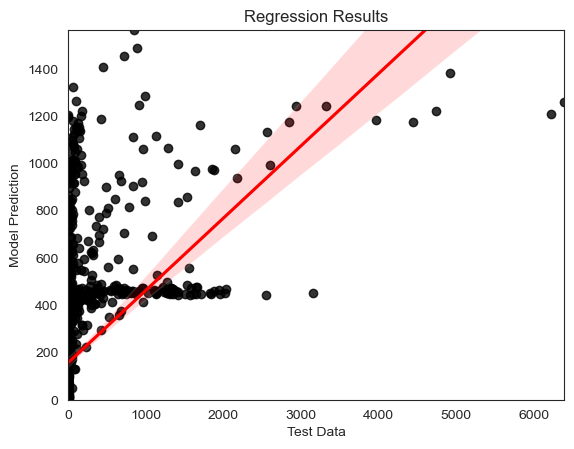

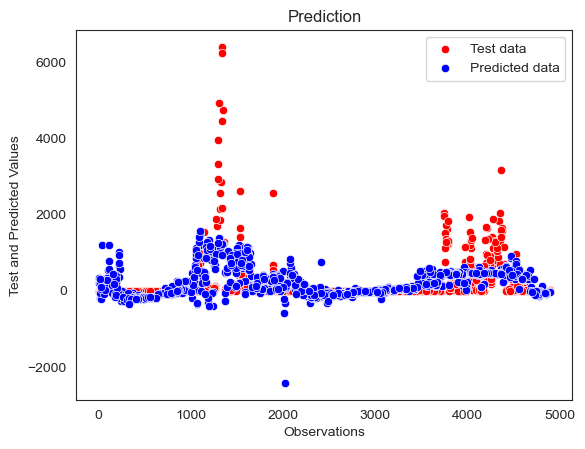

Mean Absolute Error: 283.89717843775685
Mean Squared Error: 245181.58921372684
Root Mean Squared Error: 495.1581456602798
R Squared: 0.14882285596033007


In [178]:
# 1. MLR - Multi Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # training the algorithm
print(lin_reg.intercept_)  # intercept
print(lin_reg.coef_)  # coefficients
# Prediction on test data
y_pred_lin = lin_reg.predict(X_test)
# Regression Plot - Linear Regression
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
# Metrics for Linear Regression
reg_metrics(y_test, y_pred_lin)

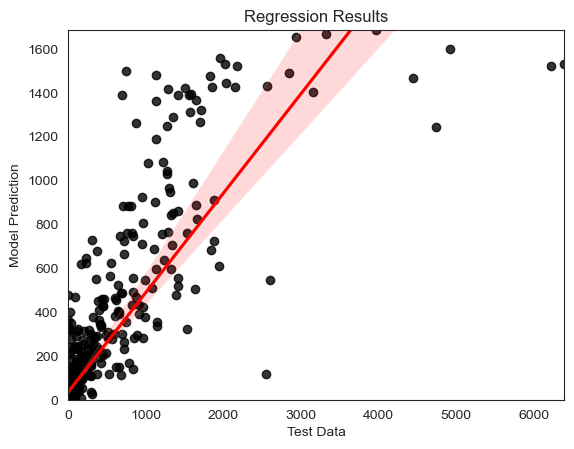

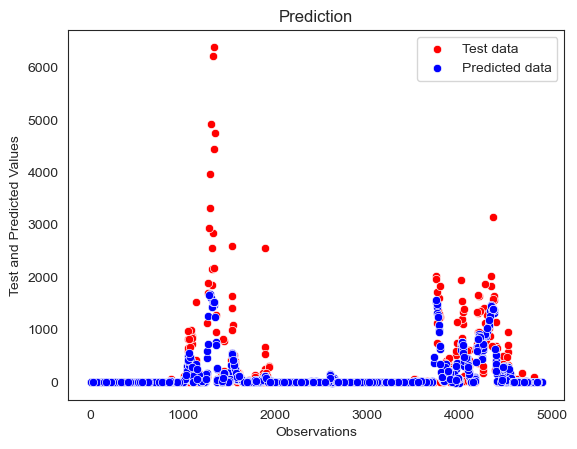

Mean Absolute Error: 82.06390155042057
Mean Squared Error: 112564.23407383321
Root Mean Squared Error: 335.5059374643513
R Squared: 0.6092198293222659


In [179]:
# 2. Support Vector Regression (SVR)
# gaussian kernel selected due to non-linearity in dataset
# Radial basis function - kernel is shown here, other available kernels include 'linear, sigmoid and polynomial'
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_svr = svr_reg.predict(X_test)
# Regression Plot - SVR
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
# Metrics for SVR
reg_metrics(y_test, y_pred_svr)

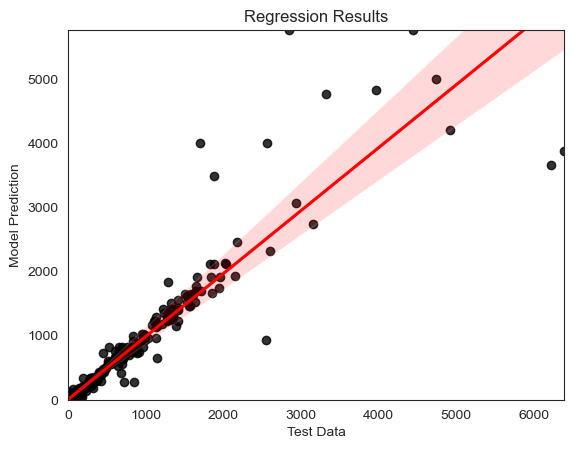

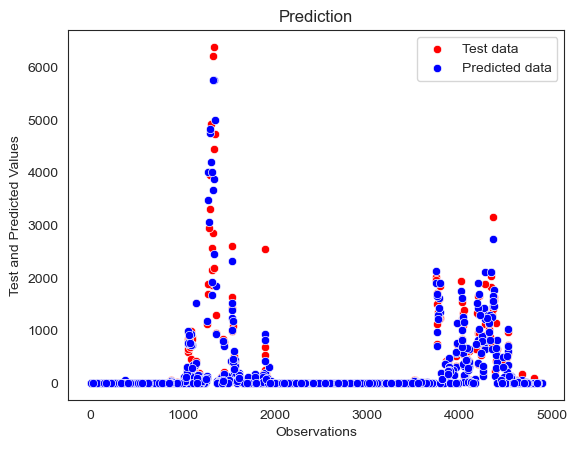

Mean Absolute Error: 29.719917095435683
Mean Squared Error: 34915.148426135005
Root Mean Squared Error: 186.85595635712286
R Squared: 0.8787878958759319


In [180]:
# 3. Decision Tree - Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_dt = dt_reg.predict(X_test)
# Regression Plot - Decision Tree
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
# Metrics for Decision Tree
reg_metrics(y_test, y_pred_dt)

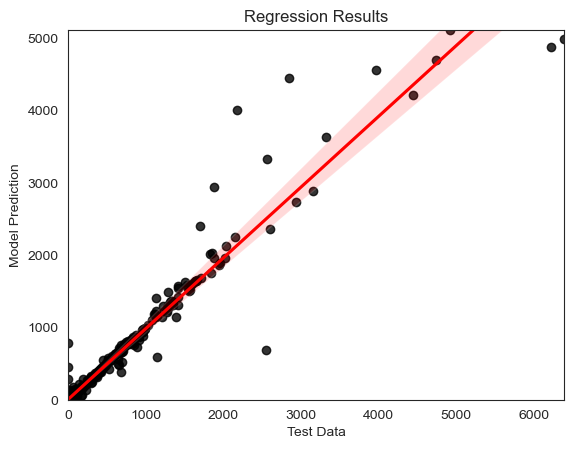

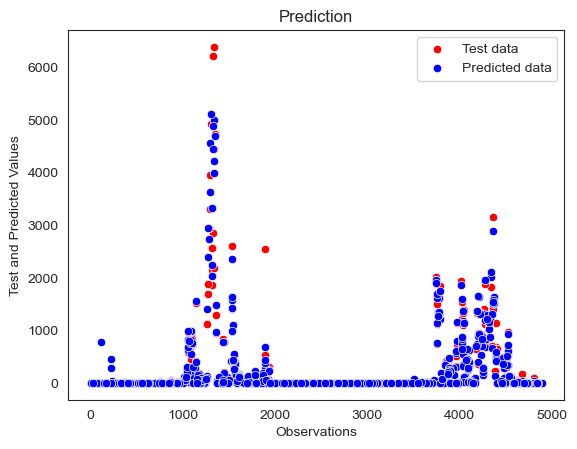

Mean Absolute Error: 19.89797187302025
Mean Squared Error: 15003.698651058761
Root Mean Squared Error: 122.48958588818383
R Squared: 0.9479128697680982


In [181]:
# 4. Random Forest - Regression
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_rf = rf_reg.predict(X_test)
# Regression Plot - Random Forest
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
# Metrics for Random Forest
reg_metrics(y_test, y_pred_rf)

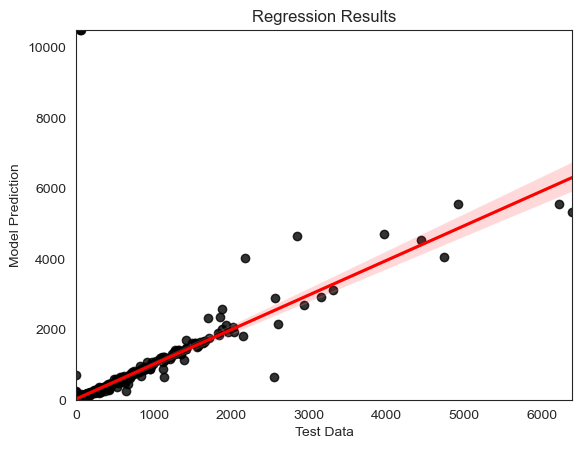

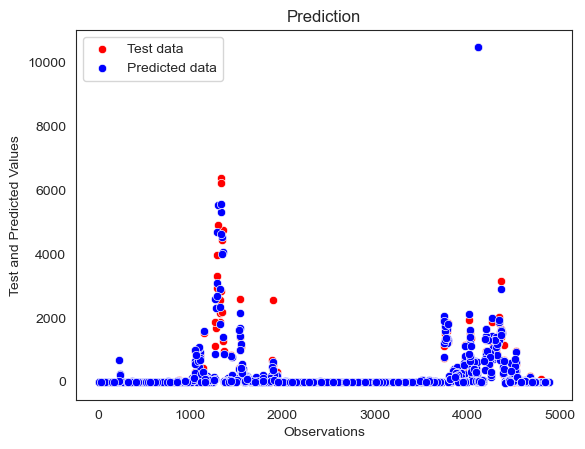

Mean Absolute Error: 39.280511420751324
Mean Squared Error: 194805.60434757752
Root Mean Squared Error: 441.3678786993652
R Squared: 0.3237090987001008


In [182]:
# 5. XGBoost - Regression
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_xgb = xgb_reg.predict(X_test)
# Regression Plot - XGBoost
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
# Metrics for XGBoost
reg_metrics(y_test, y_pred_xgb)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 1,505 (5.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 753736.1875 - mse: 753736.1875 - val_loss: 444457.3125 - val_mse: 444457.3125
Epoch 2/1000
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 749866.8750 - mse: 749866.8750 - val_loss: 437130.9062 - val_mse: 437130.9062
Epoch 3/1000
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 740651.5625 - mse: 740651.5625 - val_loss: 423669.2500 - val_mse: 423669.2500
Epoch 4/1000
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 724665.5000 - mse: 724665.5000 - val_loss: 404419.9375 - val_mse: 404419.9375
Epoch 5/1000
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 702632.8750 - mse: 702632.8750 - val_loss: 381670.4062 - val_mse: 381670.4062
Epoch 6/1000
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 676971.3125 - mse: 676971.3125 - val_loss: 359164.4688 - val_mse: 359164.4688
Epoch 7/1000
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 651588.7500 - mse: 651588.7500 - val_loss: 340209.1562 - val_mse: 340209.1562
Epoch 8/1000
85/85 ━━━━━

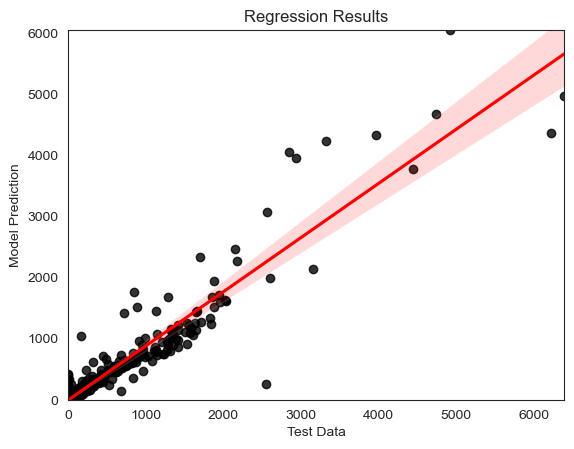

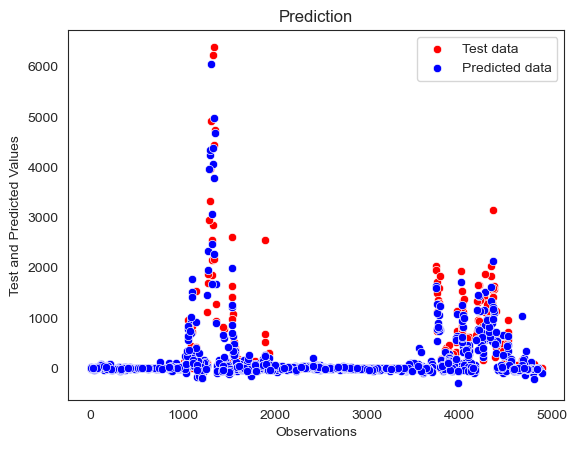

Mean Absolute Error: 64.69740529104652
Mean Squared Error: 27436.025459211854
Root Mean Squared Error: 165.6382367064195
R Squared: 0.9047525637260851


In [183]:
# 6. Artificial Neural Network
# scaling the dataset
std_scalar_X = StandardScaler()
std_scalar_Y = StandardScaler()
X_train_scaled = std_scalar_X.fit_transform(X_train)
X_test_scaled = std_scalar_Y.fit_transform(X_test)

def build_model():
    ann_reg = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(X_train.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1) ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    ann_reg.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return ann_reg

ann_reg = build_model()
ann_reg.summary()

history = ann_reg.fit(X_train_scaled, y_train.values, epochs=1000, validation_split=0.25, verbose=1)
print(history.history.keys())
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')

y_pred_ann = ann_reg.predict(X_test_scaled).flatten()
# Regression Plot - ANN
reg_plot(y_test, y_pred_ann)
scatter_plot_comparison(y_test, y_pred_ann)
# Metrics for ANN
reg_metrics(y_test, y_pred_ann)

## Classification Algorithms

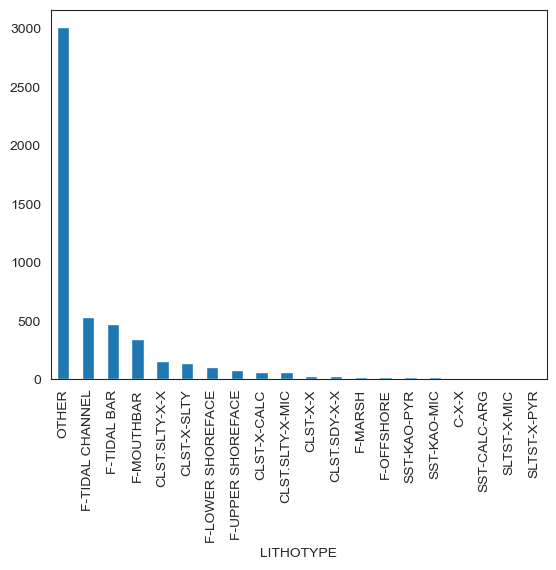

LITHOTYPE
OTHER                3010
F-TIDAL CHANNEL       537
F-TIDAL BAR           476
F-MOUTHBAR            349
CLST.SLTY-X-X         156
CLST-X-SLTY           138
F-LOWER SHOREFACE     105
F-UPPER SHOREFACE      76
CLST-X-CALC            66
CLST.SLTY-X-MIC        59
CLST-X-X               31
CLST.SDY-X-X           29
F-MARSH                20
F-OFFSHORE             20
SST-KAO-PYR            19
SST-KAO-MIC            19
C-X-X                   9
SST-CALC-ARG            4
SLTST-X-MIC             2
SLTST-X-PYR             2
Name: count, dtype: int64


In [184]:
data = pd.read_csv('/Users/staschernyshov/Desktop/OIL&GAS MACHINE LEARNING PYTHON/Pandey_Ch03_Overview_of_Machine_Learning_and_Deep_Learning_Concepts_Code/data/Merged_Data.csv')
# The response variable in the classification is 'Lithotype' with all remaining features as input'
data['LITHOTYPE'].value_counts().plot(kind='bar')
plt.show()
count_categ = data['LITHOTYPE'].value_counts()
print(count_categ)

<Axes: xlabel='LITHOTYPE'>

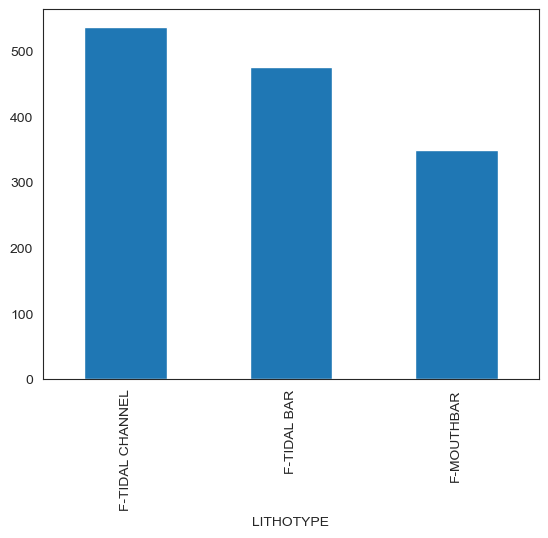

In [185]:
# As observed multiple categories are present, however 'other' won't be considered and
# only the categories with frequency of more than 200 will be included, i.e. 3 categories
data_categ = data[data['LITHOTYPE'].isin(count_categ[count_categ > 200].index)]
data_categ = data_categ[data_categ['LITHOTYPE'] != 'OTHER']
data_categ['LITHOTYPE'].value_counts()
data_categ['LITHOTYPE'].value_counts().plot(kind='bar')

In [186]:
data_categ.drop('WELL NAME', axis=1, inplace=True)
data_categ.info()
data_categ.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1362 entries, 1018 to 4658
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             1362 non-null   float64
 1   BVW (V/V)             1362 non-null   float64
 2   CARB_FLAG (UNITLESS)  1362 non-null   float64
 3   COAL_FLAG (UNITLESS)  1362 non-null   float64
 4   KLOGH (MD)            1362 non-null   float64
 5   PHIF (V/V)            1362 non-null   float64
 6   RHOFL (G/CM3)         1362 non-null   float64
 7   RHOMA (G/CM3)         1362 non-null   float64
 8   RW (OHMM)             1362 non-null   float64
 9   SAND_FLAG (UNITLESS)  1362 non-null   float64
 10  SW (V/V)              1362 non-null   float64
 11  TEMP (DEGC)           1362 non-null   float64
 12  VSH (V/V)             1362 non-null   float64
 13  LITHOTYPE             1362 non-null   object 
dtypes: float64(13), object(1)
memory usage: 159.6+ KB


DEPTH (M)  BVW (V/V)  CARB_FLAG (UNITLESS)  COAL_FLAG (UNITLESS)  \
1018    3821.73       0.06                  0.00                  0.00   
1019    3821.89       0.05                  1.00                  0.00   
1020    3822.04       0.05                  1.00                  0.00   
1021    3822.19       0.04                  1.00                  0.00   
1022    3822.34       0.04                  1.00                  0.00   
1023    3822.50       0.04                  1.00                  0.00   
1024    3822.65       0.05                  1.00                  0.00   
1025    3822.80       0.05                  0.00                  0.00   
1026    3822.95       0.05                  0.00                  0.00   
1027    3823.11       0.05                  0.00                  0.00   

      KLOGH (MD)  PHIF (V/V)  RHOFL (G/CM3)  RHOMA (G/CM3)  RW (OHMM)  \
1018      121.27        0.17           0.80           2.66       0.02   
1019        0.10        0.12           0.80           2.71       0.02   
1020        0.10        0.12           0.80           2.71       0.02   
1021        0.10        0.11           0.80           2.71       0.02   
1022        0.10        0.10           0.80           2.71       0.02   
1023        0.10        0.10           0.80           2.71       0.02   
1024        0.10        0.14           0.80           2.71       0.02   
1025       43.90        0.14           0.80           2.66       0.02   
1026       84.11        0.16           0.80           2.66       0.02   
1027       79.38        0.15           0.80           2.66       0.02   

      SAND_FLAG (UNITLESS)  SW (V/V)  TEMP (DEGC)  VSH (V/V)    LITHOTYPE  
1018                  1.00      0.38       116.35       0.14  F-TIDAL BAR  
1019                  0.00      0.44       116.35       0.12  F-TIDAL BAR  
1020                  0.00      0.39       116.36       0.13  F-TIDAL BAR  
1021                  0.00      0.38       116.36       0.11  F-TIDAL BAR  
1022                  0.00      0.41       116.36       0.13  F-TIDAL BAR  
1023                  0.00      0.44       116.37       0.11  F-TIDAL BAR  
1024                  1.00      0.36       116.37       0.13  F-TIDAL BAR  
1025                  1.00      0.37       116.37       0.16  F-TIDAL BAR  
1026                  1.00      0.32       116.38       0.15  F-TIDAL BAR  
1027                  1.00      0.34       116.38       0.14  F-TIDAL BAR

In [187]:
X = data_categ.iloc[:, :-1]
y = data_categ.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [188]:
print('Shape of Training X:', X_train.shape)
print('Shape of Training y:', y_train.shape)
print('Shape of Test X:', X_test.shape)
print('Shape of Test y:', y_test.shape)

Shape of Training X: (1021, 13)
Shape of Training y: (1021,)
Shape of Test X: (341, 13)
Shape of Test y: (341,)


In [189]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def clf_metrics(test, pred):
    '''Function returns basic metrics for classification models, including a heatmap of the confusion matrix'''
    # Accuracy and classification report
    print('Classification Accuracy Score:', accuracy_score(test, pred))
    print('Classification Report: \n', classification_report(test, pred))

    # Confusion matrix as a heatmap
    cm = confusion_matrix(test, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Classification Accuracy Score: 0.6480938416422287
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.40      0.05      0.08        87
    F-TIDAL BAR       0.53      0.86      0.66       119
F-TIDAL CHANNEL       0.82      0.85      0.84       135

       accuracy                           0.65       341
      macro avg       0.59      0.58      0.53       341
   weighted avg       0.61      0.65      0.58       341



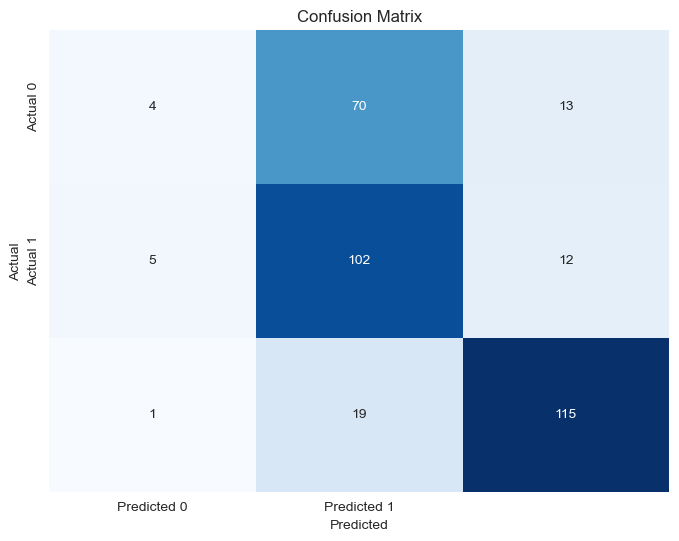

In [190]:
# 1. Logistic Regression
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train, y_train)
# Prediction on test data
y_pred_logreg = clf_logreg.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_logreg)

Classification Accuracy Score: 0.6217008797653959
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.00      0.00      0.00        87
    F-TIDAL BAR       0.50      0.87      0.64       119
F-TIDAL CHANNEL       0.80      0.81      0.80       135

       accuracy                           0.62       341
      macro avg       0.43      0.56      0.48       341
   weighted avg       0.49      0.62      0.54       341



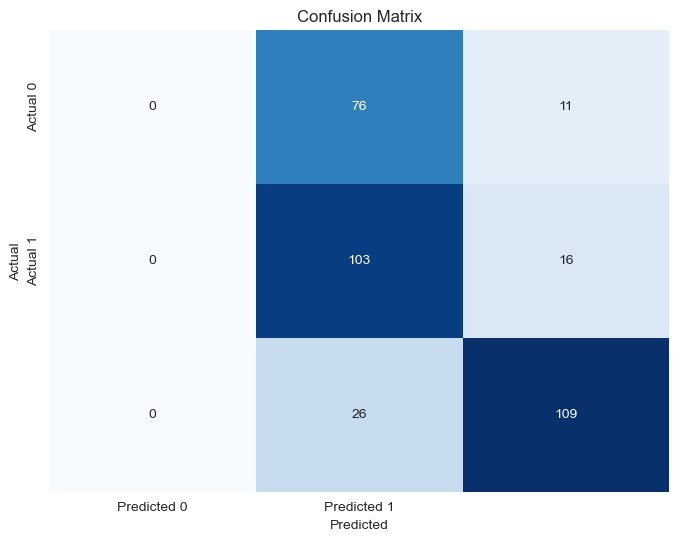

In [191]:
# 2. SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
# Prediction on test data
y_pred_svc = clf_svc.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_svc)

Classification Accuracy Score: 0.9824046920821115
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.98      0.97      0.97        87
    F-TIDAL BAR       0.98      0.97      0.98       119
F-TIDAL CHANNEL       0.99      1.00      0.99       135

       accuracy                           0.98       341
      macro avg       0.98      0.98      0.98       341
   weighted avg       0.98      0.98      0.98       341



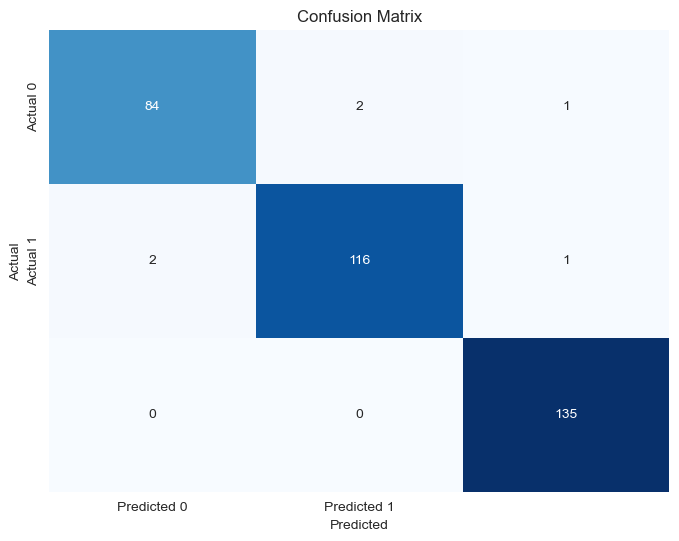

In [192]:
# 3. Decision Tree Classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
# Prediction on test data
y_pred_dt = clf_dt.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_dt)

Classification Accuracy Score: 0.9882697947214076
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.99      0.98      0.98        87
    F-TIDAL BAR       0.99      0.98      0.99       119
F-TIDAL CHANNEL       0.99      1.00      0.99       135

       accuracy                           0.99       341
      macro avg       0.99      0.99      0.99       341
   weighted avg       0.99      0.99      0.99       341



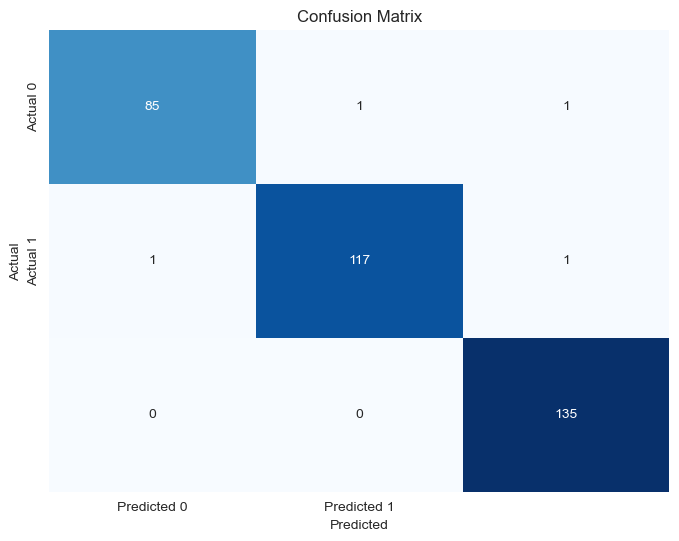

In [193]:
# 4. Random Forest Classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
# Prediction on test data
y_pred_rf = clf_rf.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_rf)

Classification Accuracy Score: 0.8592375366568915
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.83      0.75      0.79        87
    F-TIDAL BAR       0.86      0.85      0.86       119
F-TIDAL CHANNEL       0.87      0.94      0.90       135

       accuracy                           0.86       341
      macro avg       0.86      0.85      0.85       341
   weighted avg       0.86      0.86      0.86       341



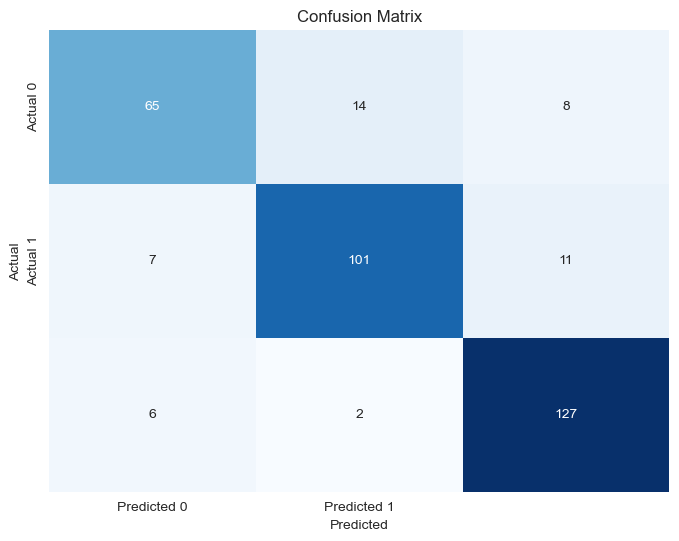

In [194]:
# 5. KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
# Prediction on test data
y_pred_knn = clf_knn.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_knn)

Classification Accuracy Score: 0.6099706744868035
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.40      0.54      0.46        87
    F-TIDAL BAR       0.61      0.34      0.44       119
F-TIDAL CHANNEL       0.77      0.89      0.82       135

       accuracy                           0.61       341
      macro avg       0.59      0.59      0.57       341
   weighted avg       0.62      0.61      0.60       341



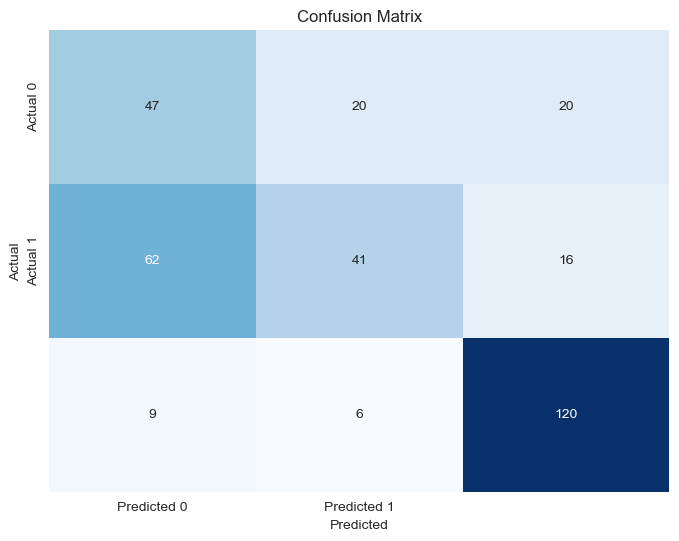

In [195]:
# 6. GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
# Prediction on test data
y_pred_gnb = clf_gnb.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_gnb)

Classification Accuracy Score: 0.7800586510263929
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.73      0.56      0.64        87
    F-TIDAL BAR       0.71      0.82      0.76       119
F-TIDAL CHANNEL       0.87      0.89      0.88       135

       accuracy                           0.78       341
      macro avg       0.77      0.76      0.76       341
   weighted avg       0.78      0.78      0.78       341



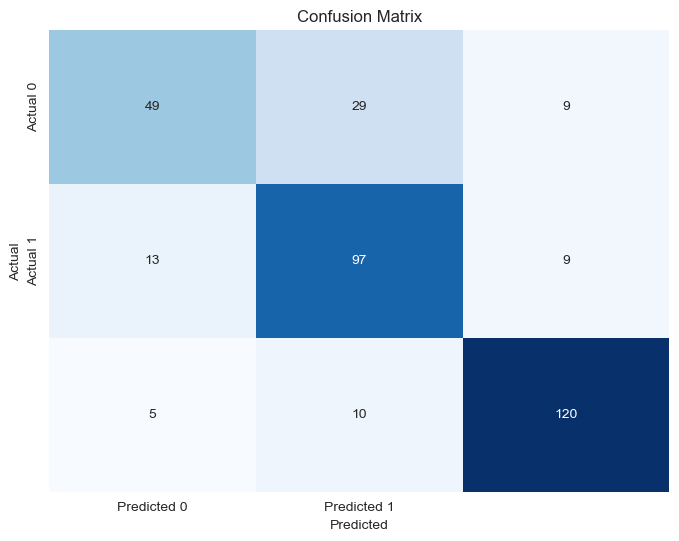

In [196]:
# 7. LDA
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)
# Prediction on test data
y_pred_lda = clf_lda.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_lda)

In [197]:
from sklearn.metrics import accuracy_score
from tabulate import tabulate  # You need to install this package with pip if you don't have it

# Function to display accuracy scores of all models in a tabular format with top 3 highlighted
def model_accuracy_summary(models, X_train, y_train, X_test, y_test):
  
    accuracy_scores = []
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Append model name and accuracy to list
        accuracy_scores.append([name, accuracy])
    
    # Sort models by accuracy in descending order
    accuracy_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Highlight top 3 models
    for idx, score in enumerate(accuracy_scores):
        if idx == 0:
            accuracy_scores[idx][0] = f"🥇 {accuracy_scores[idx][0]}"  # Gold medal for 1st place
        elif idx == 1:
            accuracy_scores[idx][0] = f"🥈 {accuracy_scores[idx][0]}"  # Silver medal for 2nd place
        elif idx == 2:
            accuracy_scores[idx][0] = f"🥉 {accuracy_scores[idx][0]}"  # Bronze medal for 3rd place

    # Convert accuracy to 4 decimal places for display
    accuracy_scores = [[name, f"{score:.4f}"] for name, score in accuracy_scores]
    
    # Use tabulate to display the results in two columns
    print(tabulate(accuracy_scores, headers=["Model", "Accuracy"], tablefmt="grid"))

# Define your models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()
}

# Call the function to display accuracy summary
model_accuracy_summary(models, X_train, y_train, X_test, y_test) 

+---------------------------+------------+
| Model                     |   Accuracy |
+===========================+============+
| 🥇 Random Forest          |     0.9883 |
+---------------------------+------------+
| 🥈 Decision Tree          |     0.9853 |
+---------------------------+------------+
| 🥉 K-Neighbors            |     0.8592 |
+---------------------------+------------+
| LDA                       |     0.7801 |
+---------------------------+------------+
| Logistic Regression       |     0.6481 |
+---------------------------+------------+
| Support Vector Classifier |     0.6217 |
+---------------------------+------------+
| Naive Bayes               |     0.61   |
+---------------------------+------------+


## Unsupervised Learning

In [198]:
# original dataset with all features
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5127 entries, 0 to 5126
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL NAME             5127 non-null   object 
 1   DEPTH (M)             5127 non-null   float64
 2   BVW (V/V)             4891 non-null   float64
 3   CARB_FLAG (UNITLESS)  4980 non-null   float64
 4   COAL_FLAG (UNITLESS)  5127 non-null   float64
 5   KLOGH (MD)            4891 non-null   float64
 6   PHIF (V/V)            4891 non-null   float64
 7   RHOFL (G/CM3)         5127 non-null   float64
 8   RHOMA (G/CM3)         4891 non-null   float64
 9   RW (OHMM)             4891 non-null   float64
 10  SAND_FLAG (UNITLESS)  4891 non-null   float64
 11  SW (V/V)              4891 non-null   float64
 12  TEMP (DEGC)           4891 non-null   float64
 13  VSH (V/V)             4891 non-null   float64
 14  LITHOTYPE             5127 non-null   object 
dtypes: float64(13), objec

WELL NAME  DEPTH (M)  BVW (V/V)  CARB_FLAG (UNITLESS)  \
0  15/9-19 A    3666.59       0.11                  0.00   
1  15/9-19 A    3666.74       0.11                  0.00   
2  15/9-19 A    3666.90       0.11                  0.00   
3  15/9-19 A    3667.05       0.11                  0.00   
4  15/9-19 A    3667.20       0.12                  0.00   
5  15/9-19 A    3667.35       0.11                  0.00   
6  15/9-19 A    3667.51       0.12                  0.00   
7  15/9-19 A    3667.66       0.12                  0.00   
8  15/9-19 A    3667.81       0.13                  0.00   
9  15/9-19 A    3667.96       0.13                  0.00   

   COAL_FLAG (UNITLESS)  KLOGH (MD)  PHIF (V/V)  RHOFL (G/CM3)  RHOMA (G/CM3)  \
0                  0.00        0.00        0.20           0.80           2.66   
1                  0.00        0.00        0.22           0.80           2.66   
2                  0.00        0.00        0.24           0.80           2.66   
3                  0.00        0.00        0.23           0.80           2.66   
4                  0.00        0.00        0.22           0.80           2.66   
5                  0.00        0.00        0.18           0.80           2.66   
6                  0.00        0.00        0.20           0.80           2.66   
7                  0.00        0.00        0.22           0.80           2.66   
8                  0.00        0.00        0.24           0.80           2.66   
9                  0.00        0.00        0.26           0.80           2.66   

   RW (OHMM)  SAND_FLAG (UNITLESS)  SW (V/V)  TEMP (DEGC)  VSH (V/V)  \
0       0.02                  0.00      0.56       112.72       0.60   
1       0.02                  0.00      0.51       112.73       0.60   
2       0.02                  0.00      0.47       112.73       0.60   
3       0.02                  0.00      0.51       112.74       0.60   
4       0.02                  0.00      0.54       112.74       0.60   
5       0.02                  0.00      0.63       112.74       0.60   
6       0.02                  0.00      0.60       112.75       0.60   
7       0.02                  0.00      0.57       112.75       0.60   
8       0.02                  0.00      0.53       112.75       0.60   
9       0.02                  0.00      0.50       112.76       0.61   

       LITHOTYPE  
0          OTHER  
1          OTHER  
2          OTHER  
3          OTHER  
4  CLST.SLTY-X-X  
5          OTHER  
6          OTHER  
7          OTHER  
8          OTHER  
9  CLST.SLTY-X-X

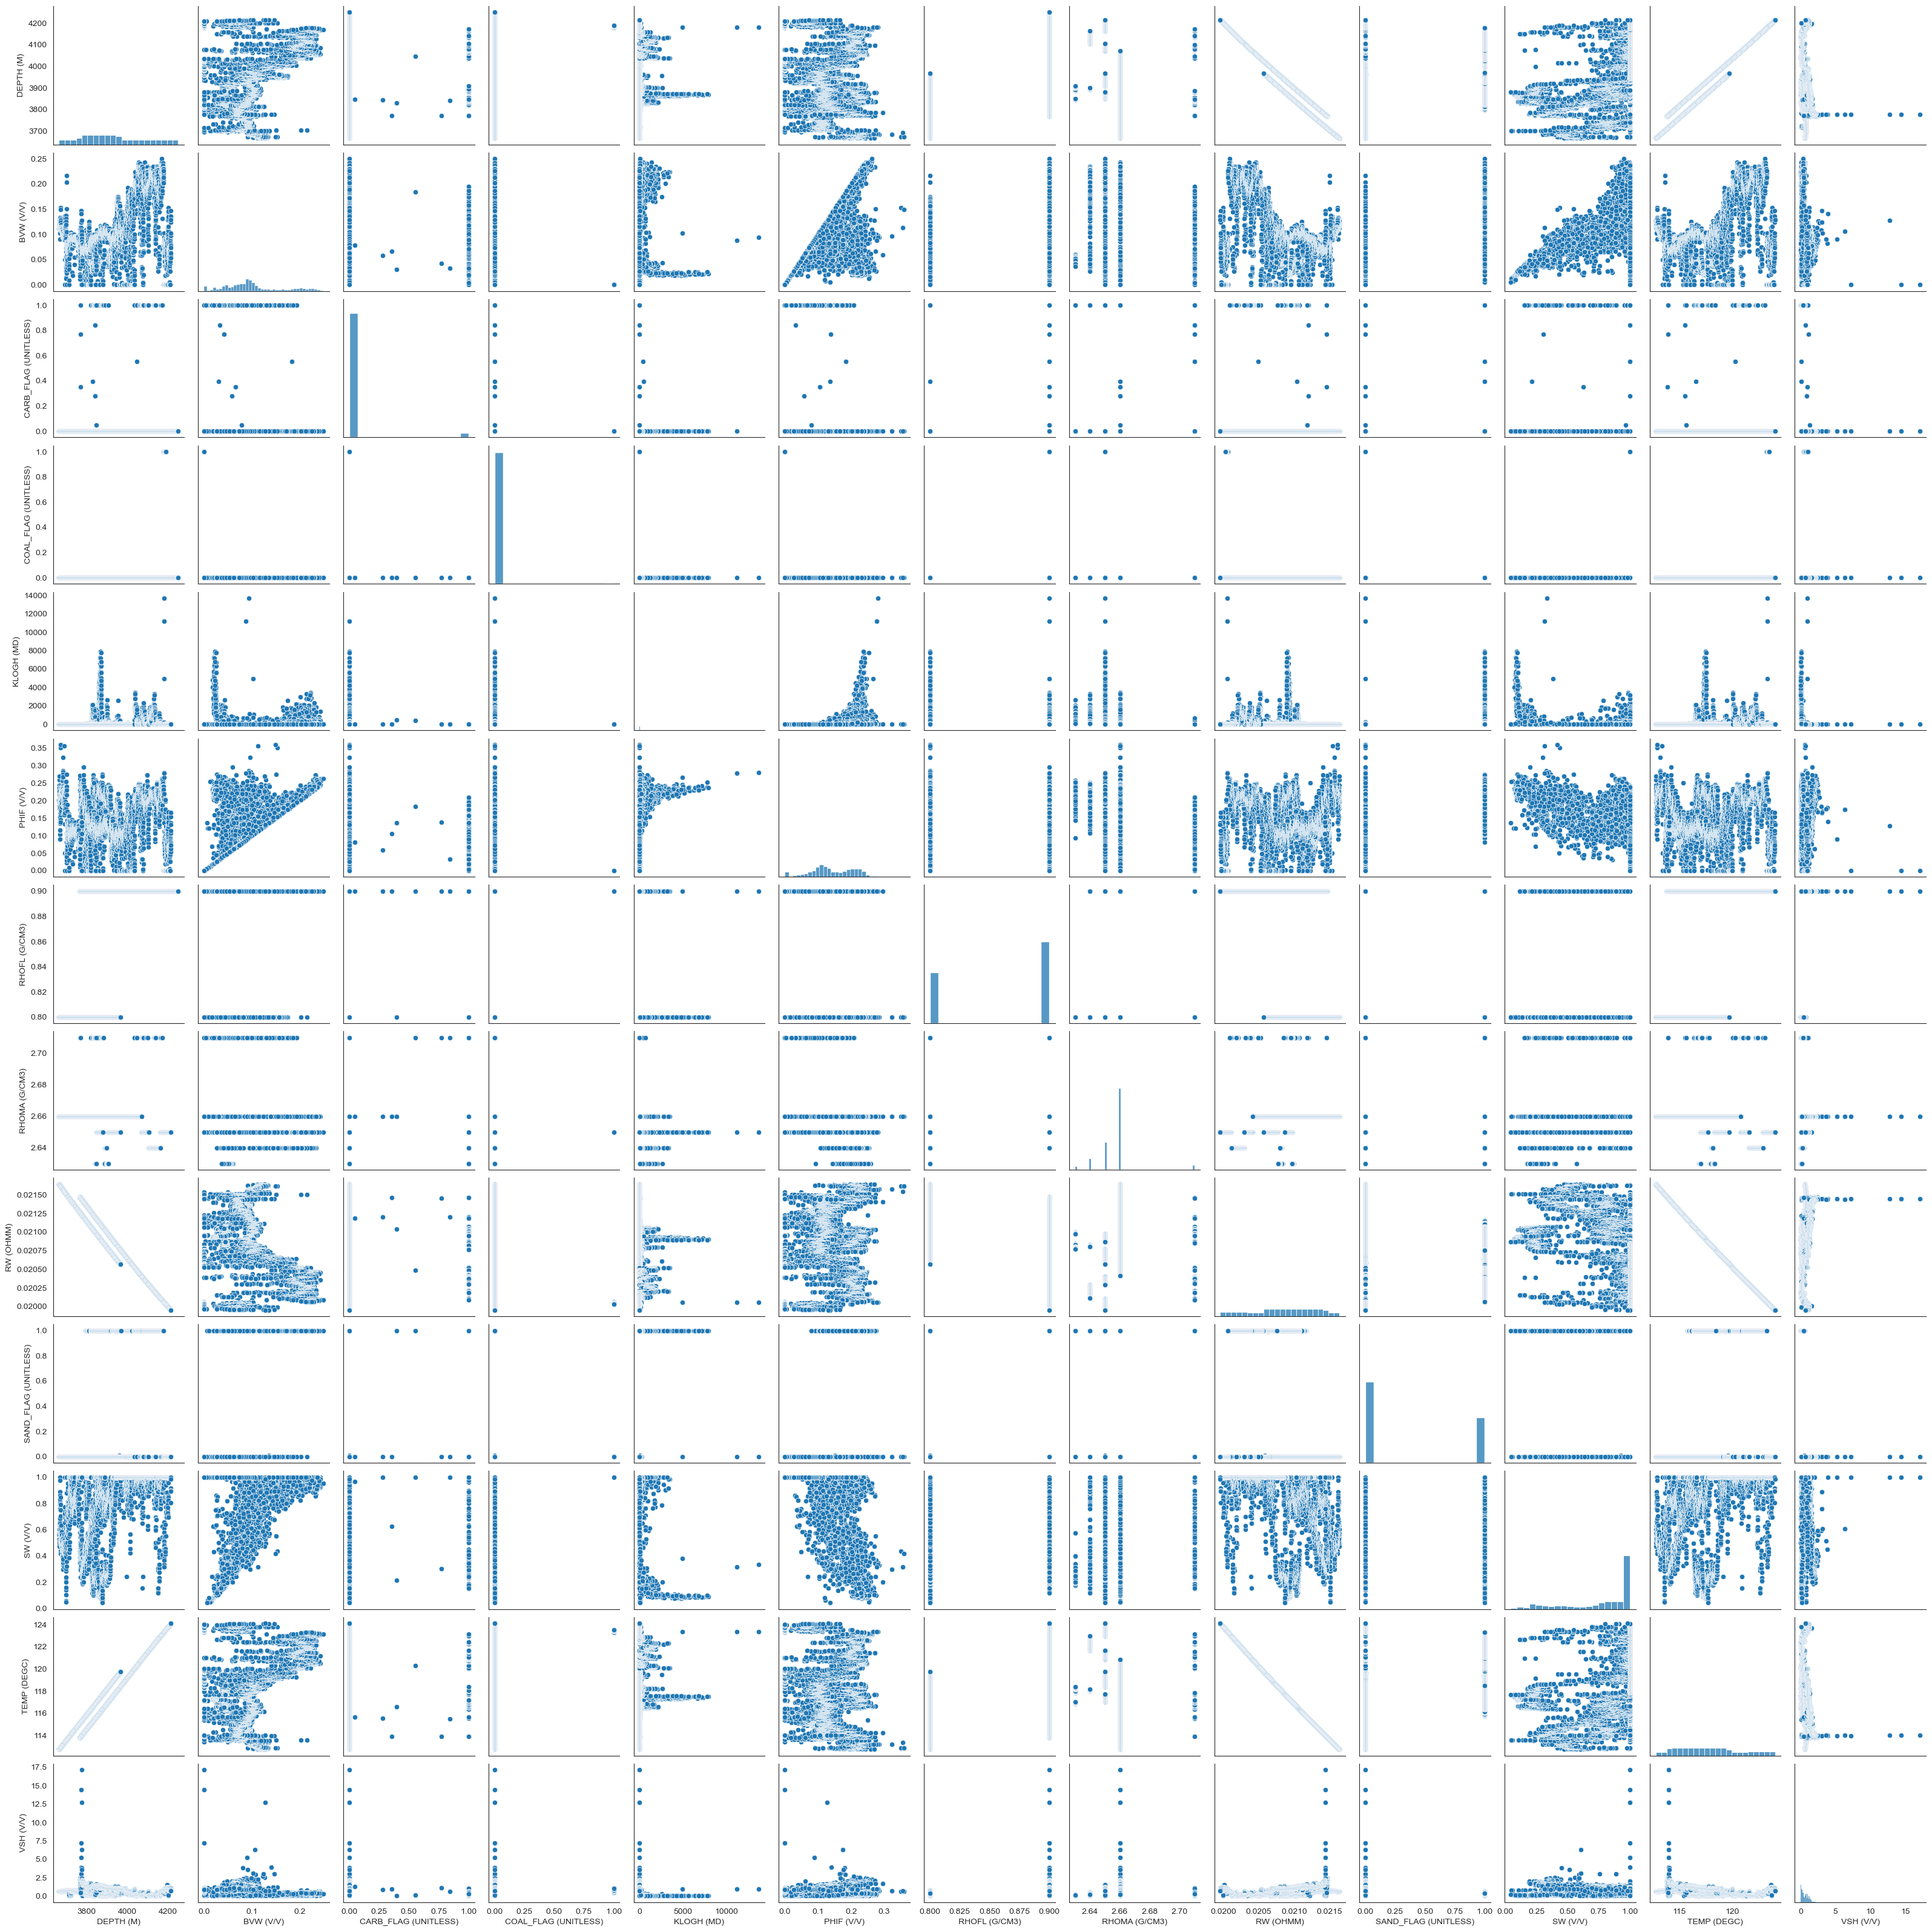

In [199]:
sns.pairplot(data)

In [200]:
X = data.drop(['WELL NAME', 'LITHOTYPE'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5127 entries, 0 to 5126
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             5127 non-null   float64
 1   BVW (V/V)             4891 non-null   float64
 2   CARB_FLAG (UNITLESS)  4980 non-null   float64
 3   COAL_FLAG (UNITLESS)  5127 non-null   float64
 4   KLOGH (MD)            4891 non-null   float64
 5   PHIF (V/V)            4891 non-null   float64
 6   RHOFL (G/CM3)         5127 non-null   float64
 7   RHOMA (G/CM3)         4891 non-null   float64
 8   RW (OHMM)             4891 non-null   float64
 9   SAND_FLAG (UNITLESS)  4891 non-null   float64
 10  SW (V/V)              4891 non-null   float64
 11  TEMP (DEGC)           4891 non-null   float64
 12  VSH (V/V)             4891 non-null   float64
dtypes: float64(13)
memory usage: 520.8 KB


In [201]:
# KMeans Clustering

# finding the optimum number of clusters in the dataset
clusters = []
for i in range(1, 13):
    km = cluster.KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

# finding the number of clusters
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 13)), y=clusters, ax=ax)
ax.set_title('Finding Optimum Number of Clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Text(0.5, 1.0, 'KMeans with 3 Clusters')

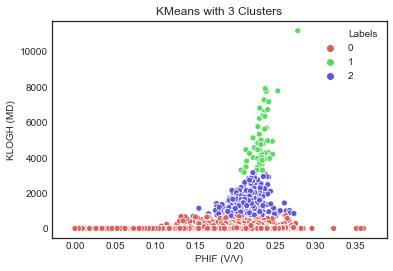

In [46]:
#  Visual Plot - 3 cluster
km3 = cluster.KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(X)
X['Labels'] = km3.labels_
X['Labels'].value_counts()
sns.scatterplot(X['PHIF (V/V)'], X['KLOGH (MD)'], hue=X['Labels'], palette=sns.color_palette('hls', X['Labels'].nunique()))
plt.title('KMeans with 3 Clusters')

In [47]:
# PCA 

data_categ.info()
dataset = data_categ.values
# One hot encoding example instead of LabelEncoder used earlier
# Encoding - Convert categorical variables to numerical form, to execute machine learning algorithms
X = data_categ.drop('LITHOTYPE', 1)
y = data_categ['LITHOTYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 1018 to 4658
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             1362 non-null   float64
 1   BVW (V/V)             1362 non-null   float64
 2   CARB_FLAG (UNITLESS)  1362 non-null   float64
 3   COAL_FLAG (UNITLESS)  1362 non-null   float64
 4   KLOGH (MD)            1362 non-null   float64
 5   PHIF (V/V)            1362 non-null   float64
 6   RHOFL (G/CM3)         1362 non-null   float64
 7   RHOMA (G/CM3)         1362 non-null   float64
 8   RW (OHMM)             1362 non-null   float64
 9   SAND_FLAG (UNITLESS)  1362 non-null   float64
 10  SW (V/V)              1362 non-null   float64
 11  TEMP (DEGC)           1362 non-null   float64
 12  VSH (V/V)             1362 non-null   float64
 13  LITHOTYPE             1362 non-null   object 
dtypes: float64(13), object(1)
memory usage: 159.6+ KB
[4.32302153e-01 2.4

In [48]:
# 4 components can explain around 86.6% variablility 
# only 4 components will be used to test classification 
pca_4comp = PCA(n_components=4)
X_train_4comp = pca_4comp.fit_transform(X_train)
X_test_4comp = pca_4comp.transform(X_test)

In [49]:
# Random Forest with entire data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 60   3   3]
 [  2  83   7]
 [  1   1 113]]
0.9377289377289377


In [50]:
# Random Forest with only 4 components
classifier_4comp = RandomForestClassifier(random_state=42)
classifier_4comp.fit(X_train_4comp, y_train)
# Predicting the Test set results
y_pred_4comp= classifier_4comp.predict(X_test_4comp)
print(confusion_matrix(y_test, y_pred_4comp))
print(accuracy_score(y_test, y_pred_4comp))

[[ 58   6   2]
 [  5  80   7]
 [  4   4 107]]
0.8974358974358975
